In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from google.colab import drive 
import os
import itertools
from tqdm import tqdm
drive.mount('/content/drive')
os.chdir('drive/MyDrive/SummerDO')


Mounted at /content/drive


####**Loading the Data and Data Wrangling**


In [ ]:
accepted = pd.read_csv("Final Code Repo/Data/Aggregated_data.csv", index_col = 'month').sample(frac = 1, axis = 0, random_state = 0)

In [ ]:
accepted = accepted.sort_index()

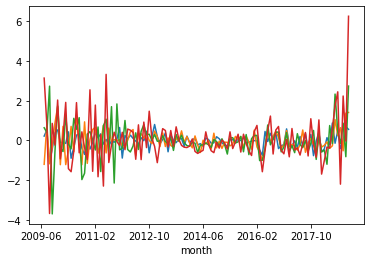

In [ ]:
accepted.loc[accepted['grade'] == 'A']['real_return_with_recoup'][24:].diff().plot()
accepted.loc[accepted['grade'] == 'B']['real_return_with_recoup'][24:].diff().plot()
accepted.loc[accepted['grade'] == 'C']['real_return_with_recoup'][24:].diff().plot()
accepted.loc[accepted['grade'] == 'D']['real_return_with_recoup'][24:].diff().plot()



## Augmented Dickey-Fuller Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('A grade, monthly change, stationarity test (more negative is better):')
print(adfuller(accepted.loc[accepted['grade'] == 'A']['real_return_with_recoup'][24:].diff().dropna(), maxlag=3, autolag=None))
print(" ")
print(" ")
print(" ")
print('B grade, monthly change, stationarity test (more negative is better):')
print(adfuller(accepted.loc[accepted['grade'] == 'B']['real_return_with_recoup'][24:].diff().dropna(), maxlag=3, autolag=None))
print(" ")
print(" ")
print(" ")
print('C grade, monthly change, stationarity test (more negative is better):')
print(adfuller(accepted.loc[accepted['grade'] == 'C']['real_return_with_recoup'][24:].diff().dropna(), maxlag=3, autolag=None))
print(" ")
print(" ")
print(" ")
print('D grade, monthly change, stationarity test (more negative is better):')
print(adfuller(accepted.loc[accepted['grade'] == 'D']['real_return_with_recoup'][24:].diff().dropna(), maxlag=3, autolag=None))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


A grade, monthly change, stationarity test (more negative is better):
(-6.016380069932624, 1.5301874358692945e-07, 3, 110, {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852})
 
 
 
B grade, monthly change, stationarity test (more negative is better):
(-5.242465698184654, 7.196536040714054e-06, 3, 110, {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852})
 
 
 
C grade, monthly change, stationarity test (more negative is better):
(-5.692549902711975, 8.009241631876523e-07, 3, 110, {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852})
 
 
 
D grade, monthly change, stationarity test (more negative is better):
(-4.324271798486853, 0.0004031310559619035, 3, 110, {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852})


In [ ]:
!pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 998 kB 5.0 MB/s 


In [ ]:
 import ruptures as rpt

In [ ]:
twenty_fifteen_google = pd.read_csv("Final Code Repo/Data/LC_Google.csv", skiprows = [1, 2])
twenty_fifteen_google.index = pd.DatetimeIndex(twenty_fifteen_google.index)

In [ ]:
twenty_fifteen_google = twenty_fifteen_google.loc['2009-06':]

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('A grade, monthly change, stationarity test (more negative is better):')
print(adfuller(twenty_fifteen_google.diff().dropna().values.flatten(), maxlag=5, autolag=None))
print(" ")
print(" ")
print(" ")
print('B grade, monthly change, stationarity test (more negative is better):')
print(adfuller(twenty_fifteen_google.diff().dropna().values.flatten(), maxlag=5, autolag=None))
print(" ")
print(" ")
print(" ")
print('C grade, monthly change, stationarity test (more negative is better):')
print(adfuller(twenty_fifteen_google.diff().dropna().values.flatten(), maxlag=5, autolag=None))
print(" ")
print(" ")
print(" ")
print('D grade, monthly change, stationarity test (more negative is better):')
print(adfuller(twenty_fifteen_google.diff().dropna().values.flatten(), maxlag=5, autolag=None))

A grade, monthly change, stationarity test (more negative is better):
(-5.400925183528703, 3.3720812059876944e-06, 5, 97, {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176})
 
 
 
B grade, monthly change, stationarity test (more negative is better):
(-5.400925183528703, 3.3720812059876944e-06, 5, 97, {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176})
 
 
 
C grade, monthly change, stationarity test (more negative is better):
(-5.400925183528703, 3.3720812059876944e-06, 5, 97, {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176})
 
 
 
D grade, monthly change, stationarity test (more negative is better):
(-5.400925183528703, 3.3720812059876944e-06, 5, 97, {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176})


## PELT Model

[30, 65, 85, 104]


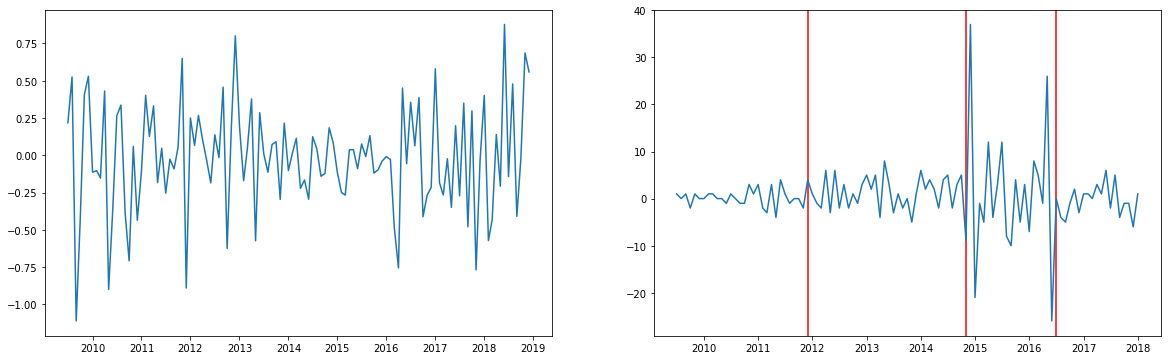

In [ ]:
fig, ax = plt.subplots(ncols = 2)

fig.set_size_inches(20, 6)

algo = rpt.Pelt(model="rbf").fit(twenty_fifteen_google.diff().fillna(0).values.flatten())
result = algo.predict(pen=2)

print(result)
for i in result:
  if i != len(twenty_fifteen_google):
    ax[1].axvline(twenty_fifteen_google.index[i], color = 'red')

ax[1].plot(twenty_fifteen_google.diff())
series = accepted.loc[accepted['grade'] == "A"]['real_return_with_recoup'][24:].diff().dropna()
series.index = pd.DatetimeIndex(series.index)
ax[0].plot(series)

2016-03-01 00:00:00
2016-03-01 00:00:00


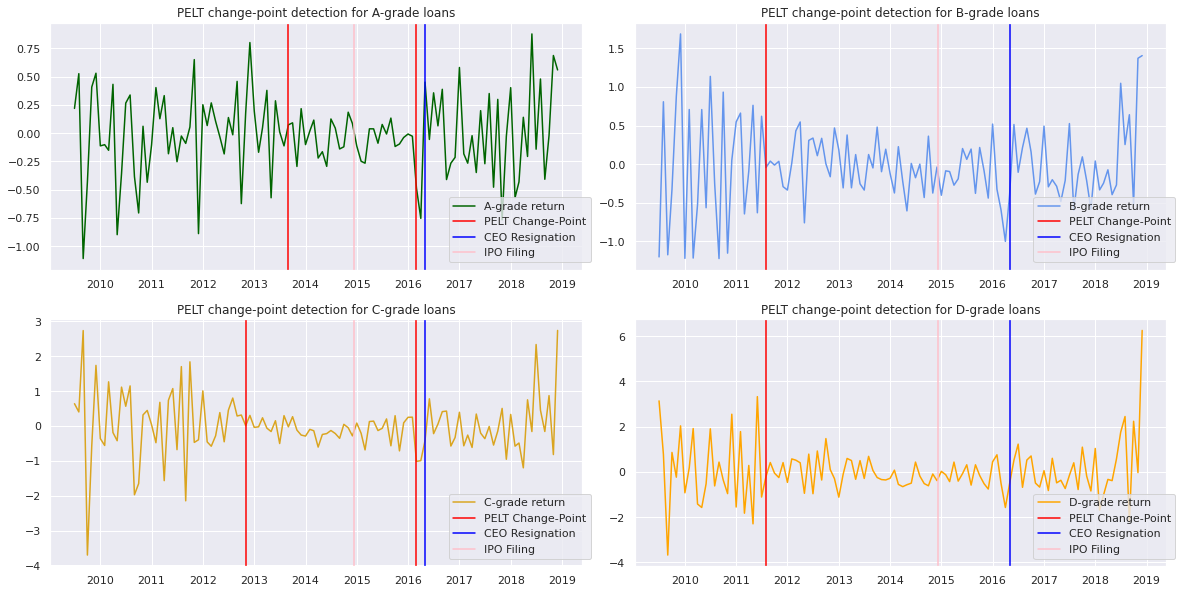

In [ ]:
grades = iter(sorted(accepted['grade'].unique())[:5])
colors = iter(['darkgreen', 'cornflowerblue', 'goldenrod', 'orange'])
fig, ax= plt.subplots(ncols = 2, nrows = 2, gridspec_kw = {"wspace": 0.1})
fig.set_size_inches(20, 10)

for i in range(2):
  for j in range(2):

    grade = next(grades)
    series = accepted.loc[accepted['grade'] == grade]['real_return_with_recoup'][24:].diff().dropna()
    algo = rpt.Pelt(model="rbf").fit(series.values)
    result = algo.predict(pen=2.5)
    series.index = pd.DatetimeIndex(series.index)
    ax[i, j].plot(series, color = next(colors), label = f"{grade}-grade return")
    for k in result[:-1]:
      if k == result[:-1][0]:
        
        ax[i, j].axvline(series.index[k], color = 'red', label = "PELT Change-Point")
      else:
        print(series.index[k])
        ax[i, j].axvline(series.index[k], color = 'red')

    ax[i, j].axvline(pd.to_datetime('2016-05-01'), color = 'blue', label = "CEO Resignation")
    ax[i, j].axvline(pd.to_datetime('2014-12-10'), color = 'pink', label = "IPO Filing")

    ax[i, j].set_title(f"PELT change-point detection for {grade}-grade loans")

    ax[i, j].legend(loc = [0.75, 0.03])
  
plt.savefig("CPD.png")

## Analysis of LC Interest in 2016

In [ ]:
Google_2016_Lender_Club = pd.read_csv("2016.csv", skiprows = [1,2])

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})

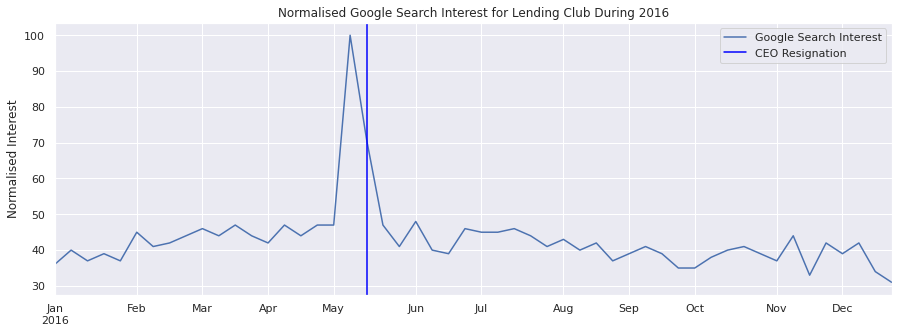

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
Google_2016_Lender_Club.index = pd.DatetimeIndex(Google_2016_Lender_Club.index)
Google_2016_Lender_Club.plot(ax =ax)
ax.axvline(pd.to_datetime('2016-05-07'), color = 'blue', label = "CEO Resignation")
ax.set_title("Normalised Google Search Interest for Lending Club During 2016")
ax.set_ylabel("Normalised Interest")
ax.legend(['Google Search Interest', "CEO Resignation"])

,Category: All categories
2016-01-03,36
2016-01-10,40
2016-01-17,37
2016-01-24,39
2016-01-31,37
2016-02-07,45
2016-02-14,41
2016-02-21,42
2016-02-28,44
2016-03-06,46


ConversionError: ignored

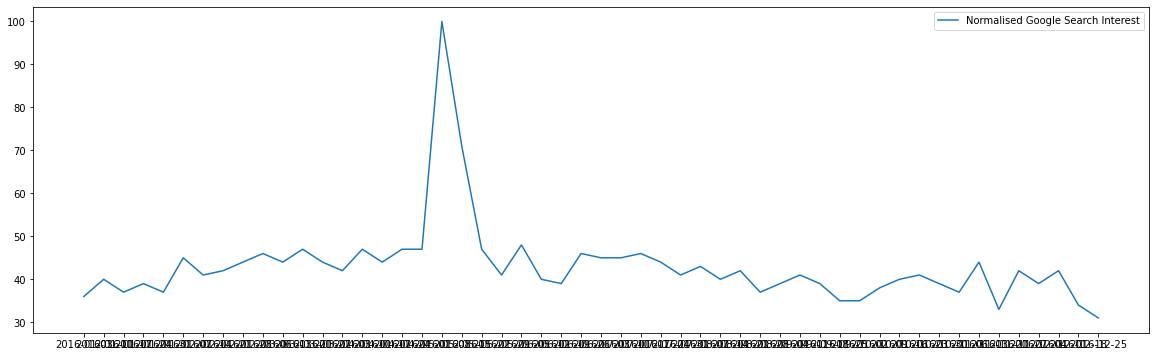

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
Google_2016_Lender_Club = pd.read_csv("2016.csv", skiprows = [1,2])
display(Google_2016_Lender_Club)
plt.plot(Google_2016_Lender_Club)
ax.legend(['Normalised Google Search Interest'])
ax.axvline(pd.to_datetime('2016-05-09'), color = 'blue', label = "CEO Resignation")
ax.set_title("Normalised Google Search Interest for Lending Club During the ")